#  DATA PREPROCESSING

In [265]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [266]:
df = pd.read_csv("/Users/anuragchaubey/customer-segmentation/data/OnlineRetail.csv")

In [267]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
396649,571082,22630,DOLLY GIRL LUNCH BOX,1,10/13/2011 15:25,4.13,NaN,United Kingdom
485855,577690,22557,PLASTERS IN TIN VINTAGE PAISLEY,5,11/21/2011 11:34,1.65,12856.0,United Kingdom
58553,541253,84078A,SET/4 WHITE RETRO STORAGE CUBES,1,1/16/2011 13:51,39.95,17841.0,United Kingdom
236053,557673,23199,JUMBO BAG APPLES,100,6/22/2011 10:15,1.79,16180.0,United Kingdom
324175,565396,21754,HOME BUILDING BLOCK WORD,2,9/2/2011 16:39,11.63,NaN,United Kingdom


In [268]:
df.shape

(541909, 8)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [270]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


dealing with missing data

In [271]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [272]:
# percentage of missing values
(df.isnull().sum() / len(df)) * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [273]:
# calculation of percentage of missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_percent
})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage (%)', ascending=False)
missing_df

,Missing Values,Percentage (%)
CustomerID,135080,24.926694
Description,1454,0.268311


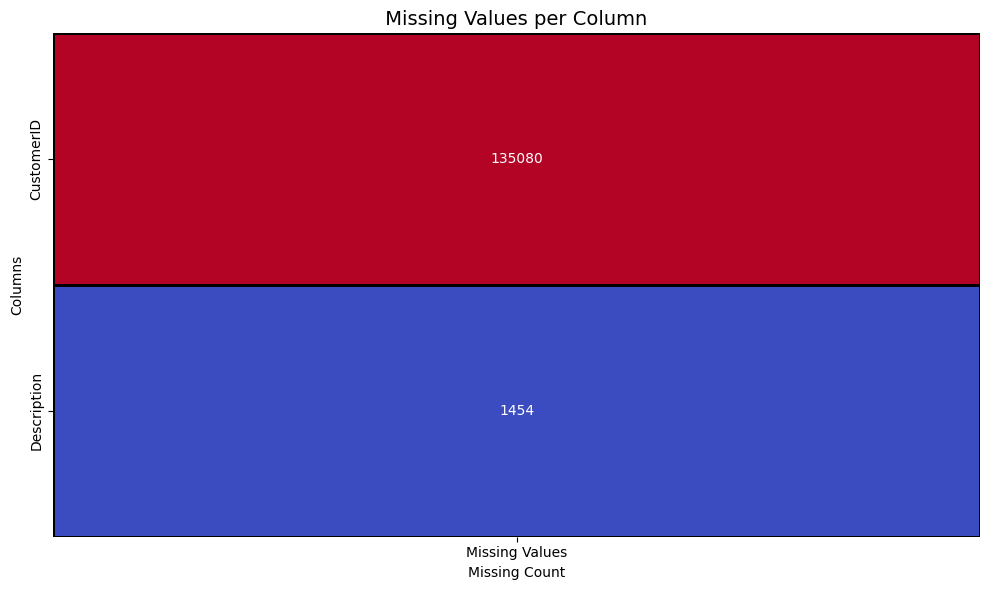

In [274]:
# visual analysis of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(missing_df[['Missing Values']], annot=True, fmt='g', cmap='coolwarm', 
            cbar=False, 
            linewidths=1,
            linecolor='black'
)

plt.title(" Missing Values per Column ", fontsize=14)
plt.ylabel("Columns")
plt.xlabel("Missing Count")
plt.tight_layout()
plt.show()

In [275]:
# customer id column has >20% missing values (remove)
df = df.dropna(subset=['CustomerID'])

In [276]:
# fill missing values in desccreption with placeholder
df['Description'] = df['Description'].fillna("Unknown")

In [277]:
# cross verification of null values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

fix data types of all columns 

In [278]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)
df['StockCode'] = df['StockCode'].astype(str)
df['Description'] = df['Description'].astype(str)

# convert invoice date to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [280]:
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [281]:
# check the cancelled invoices
df[df['InvoiceNo'].str.startswith('C')].head()
df[df['InvoiceNo'].str.startswith('C')].value_counts()

# remove all the values for cancelled invoice
df = df[~df['InvoiceNo'].str.startswith('C')]

In [282]:
# remove quantity and unitprice with invalid values
df=df[(df['Quantity']>0) & (df['UnitPrice']>0)]

create a new column for total amount

In [283]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']

In [284]:
df[['Quantity', 'UnitPrice', 'TotalAmount']].head()

,Quantity,UnitPrice,TotalAmount
0,6,2.55,15.30
1,6,3.39,20.34
2,8,2.75,22.00
3,6,3.39,20.34
4,6,3.39,20.34


In [285]:
# check for 0 amount
df[df['TotalAmount']==0]

df = df[df['TotalAmount']>0]

final check for the cleaning process

In [286]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   TotalAmount  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [287]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalAmount
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


In [288]:
df.shape

(397884, 9)

In [289]:
# save cleaned data
df.to_csv("cleaned_data.csv",index=False)